In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000859070"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000859070
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,FIRST COMMUNITY BANKSHARES INC /VA/
Ticker,FCBC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,23.0,1.830826e+01,2.574530e+00,14.29,1.542500e+01,19.48,20.48,21.06
interest income,45.0,2.523533e+07,2.332964e+06,22466000.00,2.362100e+07,24305000.00,26155000.00,32732000.00
net income,41.0,6.362244e+06,4.740403e+06,-14316000.00,5.435000e+06,6202000.00,7141000.00,25238000.00
net interest income,55.0,2.019336e+07,2.519963e+06,15310000.00,1.822550e+07,19778000.00,22059000.00,26459000.00
provision for loan losses,53.0,1.516698e+06,1.335269e+06,0.00,5.790000e+05,947000.00,2087000.00,6996000.00


# Plots

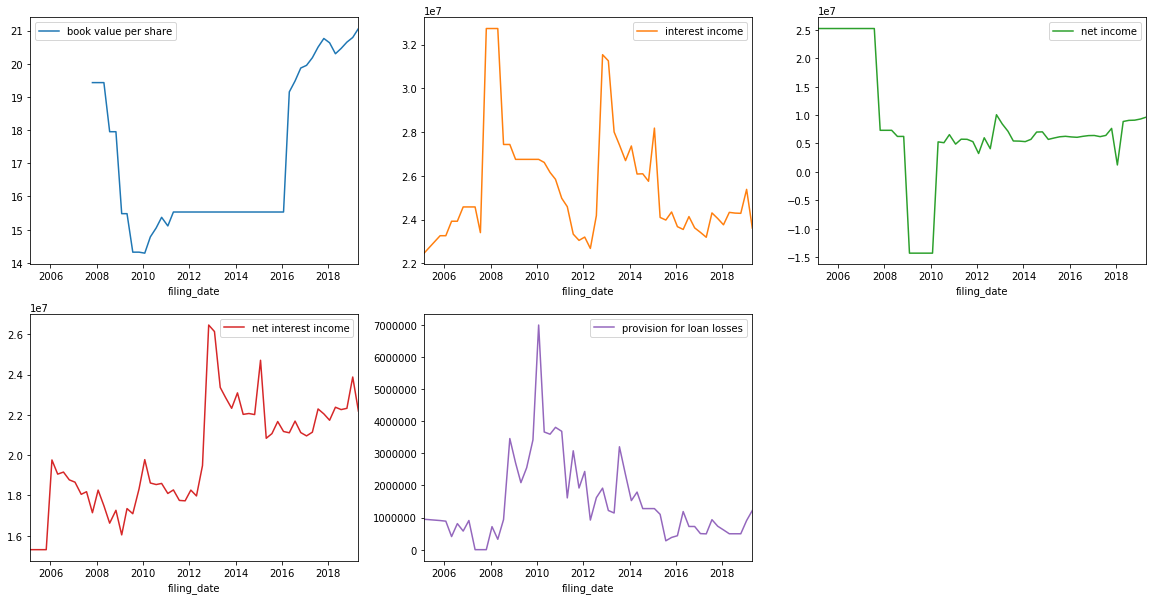

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000859070 book value per share       2002Q4 to 2007Q2: 19 periods  missing   
           book value per share        2007Q4 to 2008Q1: 2 periods  missing   
           book value per share                             2008Q3  missing   
           book value per share                             2009Q1  missing   
           book value per share                             2009Q3  missing   
           book value per share       2011Q2 to 2015Q4: 19 periods  missing   
           interest income            2003Q1 to 2005Q2: 10 periods  missing   
           interest income                                  2005Q4  missing   
           interest income                                  2006Q2  missing   
           interest income             2006Q4 to 2007Q1: 2 periods  missing   
           interest income             2007Q4 to 2008Q1: 2 periods  missing   
           interest income                                  2008Q3  missing   
           interest income             2009Q1 to 2009Q4: 4 periods  missing   
           net income                  2002Q4 to 2003Q3: 4 periods  missing   
           net income                 2004Q1 to 2007Q2: 14 periods  missing   
           net income                  2007Q4 to 2008Q1: 2 periods  missing   
           net income                                       2008Q3  missing   
           net income                  2009Q1 to 2009Q4: 4 periods  missing   
           net interest income        2003Q1 to 2005Q3: 11 periods  missing   
           provision for loan losses  2003Q1 to 2005Q2: 10 periods  missing   
           provision for loan losses   2014Q3 to 2014Q4: 2 periods  missing   
           provision for loan losses                        2016Q3  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000859070 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()